In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,8)

# 1 - Reading the data

In [2]:
survey_info = pd.read_csv("survey_results_public.csv")
survey_schema = pd.read_csv("survey_results_schema.csv")

# 2 - Exploratory Data Analysis

In [3]:
# An overview of the survey_info dataframe
survey_info.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [4]:
print("The survey_info dataframe has: " + str(survey_info.shape[0]) + " rows.")

The survey_info dataframe has: 88883 rows.


In [5]:
print("The survey_info dataframe has: " + str(survey_info.shape[1]) + " columns")

The survey_info dataframe has: 85 columns


In [6]:
# These are the survey_info dataframe columns
survey_info.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [7]:
# An overview of the survey_info dataframe
survey_schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...


survey_schema carries the description of each one the columns of survey_info 

In [8]:
# And this table has the description of each one the columns
survey_schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...


Next, we compute some statistics for the survey_info dataframe

In [9]:
#Summary statistics
survey_info.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


Let's get the description for variables that show up in the table above.

In [10]:
survey_schema[survey_schema["Column"] == "Respondent"].values[0][1]

'Randomized respondent ID number (not in order of survey response time)'

In [11]:
survey_schema[survey_schema["Column"] == "CompTotal"].values[0][1]

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [12]:
survey_schema[survey_schema["Column"] == "ConvertedComp"].values[0][1]

'Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks.'

In [13]:
survey_schema[survey_schema["Column"] == "WorkWeekHrs"].values[0][1]

'On average, how many hours per week do you work?'

In [14]:
survey_schema[survey_schema["Column"] == "CodeRevHrs"].values[0][1]

'On average, how many hours per week do you spend on code review?'

In [15]:
survey_schema[survey_schema["Column"] == "Age"].values[0][1]

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

What are the correlations among the numeric variables ?

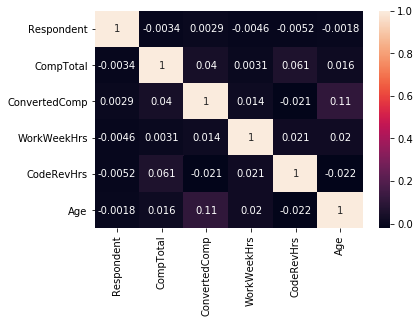

In [16]:
#gets list of numeric columns
numeric_cols = list(survey_info.select_dtypes(include=["int", "float"]).columns)
#heatmap of the correlations among numeric variables
sns.heatmap(survey_info[numeric_cols].corr(), annot=True)

The variables with the strongest correlation are ConvertedComp and Age

Which columns in the survey_info dataframe have the highest number oif missing values ?

Text(0, 0.5, 'Number of missing values')

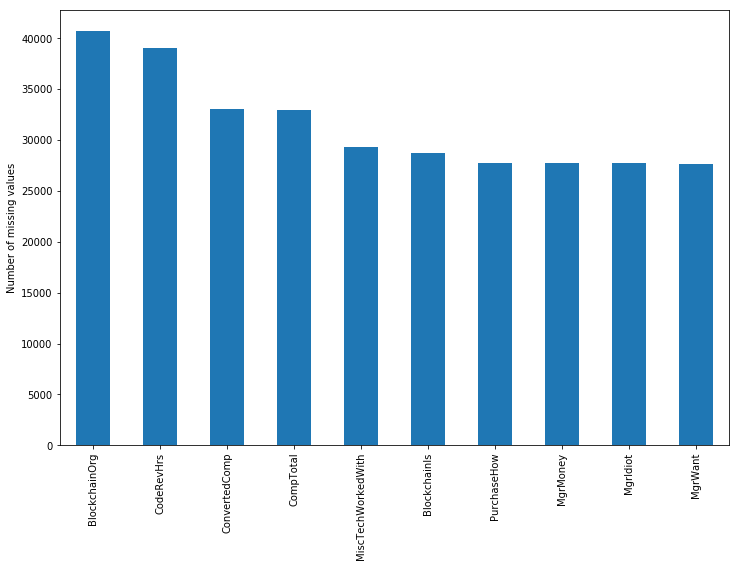

In [17]:
survey_info.isna().sum().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(12,8))
plt.ylabel("Number of missing values")

The plot above shows number of missing values in ascending order for the first 10 columns. What is the frequency of missing values for columns shown in the plot above ?  

Text(0, 0.5, 'Frequency of missing values')

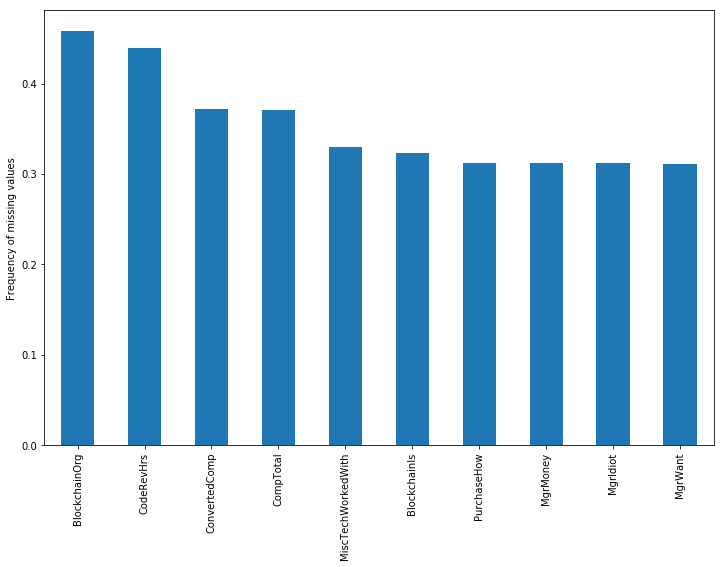

In [18]:
(survey_info.isna().sum().sort_values(ascending=False)[:10]/survey_info.shape[0]).plot(kind="bar", figsize=(12,8))
plt.ylabel("Frequency of missing values")

Almost 50% of the data in the BlockchainOrg column is missing.

In [19]:
numeric_columns = list(survey_info.select_dtypes(include=["int", "float"]).columns)
numeric_df = survey_info[numeric_columns]

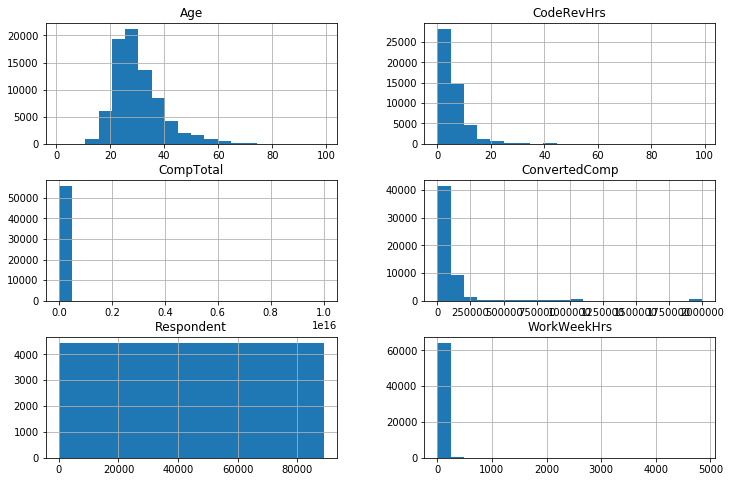

In [20]:
numeric_df.hist(bins=20, figsize=(12,8));
plt.rcParams["figure.figsize"] = (14,8)

As we can from the histograms, the distributions of CompTotal, CodeRevHrs and WorkWeekHrs are clearly right skewed.

## 2.1 - Does the frequency people visit StackOverflow have any relationship with salary ? 

In [21]:
survey_schema[survey_schema["Column"] == "SOVisitFreq"].values[0][1]

'How frequently would you say you visit Stack Overflow?'

In [22]:
survey_info["SOVisitFreq"].value_counts()

Daily or almost daily                                 26827
Multiple times per day                                26767
A few times per week                                  19990
A few times per month or weekly                       11162
Less than once per month or monthly                    2957
I have never visited Stack Overflow (before today)      560
Name: SOVisitFreq, dtype: int64

In [23]:
survey_info.groupby("SOVisitFreq").mean()["ConvertedComp"].sort_values(ascending=False)

SOVisitFreq
I have never visited Stack Overflow (before today)    187259.507246
Less than once per month or monthly                   148231.621291
A few times per month or weekly                       142615.773799
A few times per week                                  139905.141360
Daily or almost daily                                 124174.552105
Multiple times per day                                114988.912762
Name: ConvertedComp, dtype: float64

Text(0, 0.5, 'Salary')

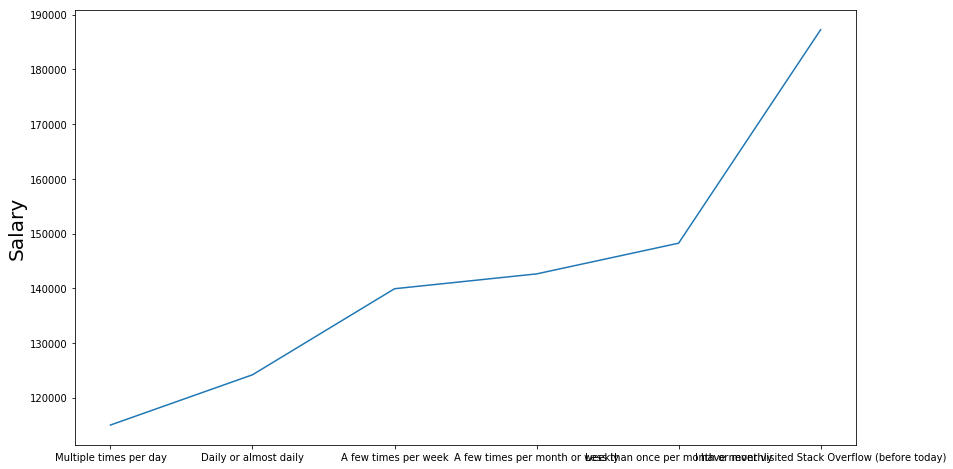

In [24]:
survey_info.groupby("SOVisitFreq").mean()["ConvertedComp"].sort_values(ascending=True).plot(kind="bar")
plt.ylabel("Salary", fontsize=20)

It looks like people with higher salaries don't visit StackOverflow as frequently as people with lower salaries. 

## 2.2 - Does working remotely have any  relationship with salary ?

In [25]:
survey_info.groupby(["WorkRemote"]).mean()["ConvertedComp"].sort_values(ascending=False)

WorkRemote
Less than half the time, but at least one day each week    157279.717618
A few days each month                                      144144.191453
All or almost all the time (I'm full-time remote)          139081.902855
More than half, but not all, the time                      122363.846939
About half the time                                        121308.300676
Less than once per month / Never                           111321.634132
It's complicated                                            97571.322062
Name: ConvertedComp, dtype: float64

Apparently, there's no relationship between the frequency of working remotely and salary.

## 2.3 - Does age have any influence on JobSatisfaction ?

In [26]:
#since the age distribution is skewed, we'll use median as measure of central tendency
survey_info.groupby(["JobSat"]).median()["Age"].sort_values()

JobSat
Neither satisfied nor dissatisfied    29.0
Slightly satisfied                    29.0
Slightly dissatisfied                 30.0
Very dissatisfied                     30.0
Very satisfied                        30.0
Name: Age, dtype: float64

There's no apparent relationship bewteen age and job satisfaction.

# 3 - Modelling 

How well can we predict salary using a linear regression model and only numeric features ?

In [27]:
#dropping nas
survey_info = survey_info.dropna(subset=["ConvertedComp"], axis=0)

#response variable
y = survey_info["ConvertedComp"]

#drop salary column
survey_info.drop(columns=["ConvertedComp"], inplace=True)

#Imputing missing values in numeric columns with the mean
numeric_cols = list(survey_info.select_dtypes(include=["int", "float"]).columns)
for col in numeric_cols:
    survey_info[col].fillna(survey_info[col].mean(), inplace=True)

#explanatory variables    
X = survey_info[numeric_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#instantiate linear regression model
lm = LinearRegression(normalize=True)
#fitting the model to training data
lm.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [28]:
#prediction on test set
y_pred = lm.predict(X_test)

In [29]:
#test score
r2_score(y_test, y_pred)

0.01306329682914531

The R² is low. It means that our linear regression model doesn't make good job at predicting the salary.